In [1]:
#Task 3: Data Pre-Processing :
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('insurance.csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Display information about the dataset
print(df.info())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Colu

In [7]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [9]:
# Define a function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in the 'expenses' column
outliers = detect_outliers(df, 'expenses')
print(outliers)

      age     sex   bmi  children smoker     region  expenses
14     27    male  42.1         0    yes  southeast  39611.76
19     30    male  35.3         0    yes  southwest  36837.47
23     34  female  31.9         1    yes  northeast  37701.88
29     31    male  36.3         2    yes  southwest  38711.00
30     22    male  35.6         0    yes  southwest  35585.58
...   ...     ...   ...       ...    ...        ...       ...
1300   45    male  30.4         0    yes  southeast  62592.87
1301   62    male  30.9         3    yes  northwest  46718.16
1303   43    male  27.8         0    yes  southwest  37829.72
1313   19  female  34.7         2    yes  southwest  36397.58
1323   42  female  40.4         2    yes  southeast  43896.38

[139 rows x 7 columns]


In [11]:
# Remove outliers from the 'expenses' column
df = df[~df.index.isin(outliers.index)]

In [13]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [15]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'bmi', 'children', 'expenses']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'expenses']])

In [17]:
# Final check
print(df.head())
print(df.describe())

        age       bmi  children  expenses  sex_male  smoker_yes  \
0 -1.421544 -0.365636 -0.893260  0.961182     False        True   
1 -1.492656  0.616460 -0.069399 -1.133192      True       False   
2 -0.781529  0.483295  1.578322 -0.756865      True       False   
3 -0.425965 -1.231213 -0.893260  1.665721      True       False   
4 -0.497078 -0.199179 -0.893260 -0.837355      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  
                age           bmi      children      expenses
count  1.199000e+03  1.199000e+03  1.199000e+03  1.199000e+03
mean  -2.666758e-17 -3.970506e-16  7.037277e-17 -1.140780e-16
std    1.000417e+00  1.000417e+00  1.000417e+00  1.000417e+00
m

First few rows of the dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary statistics:
               age          bmi     children   

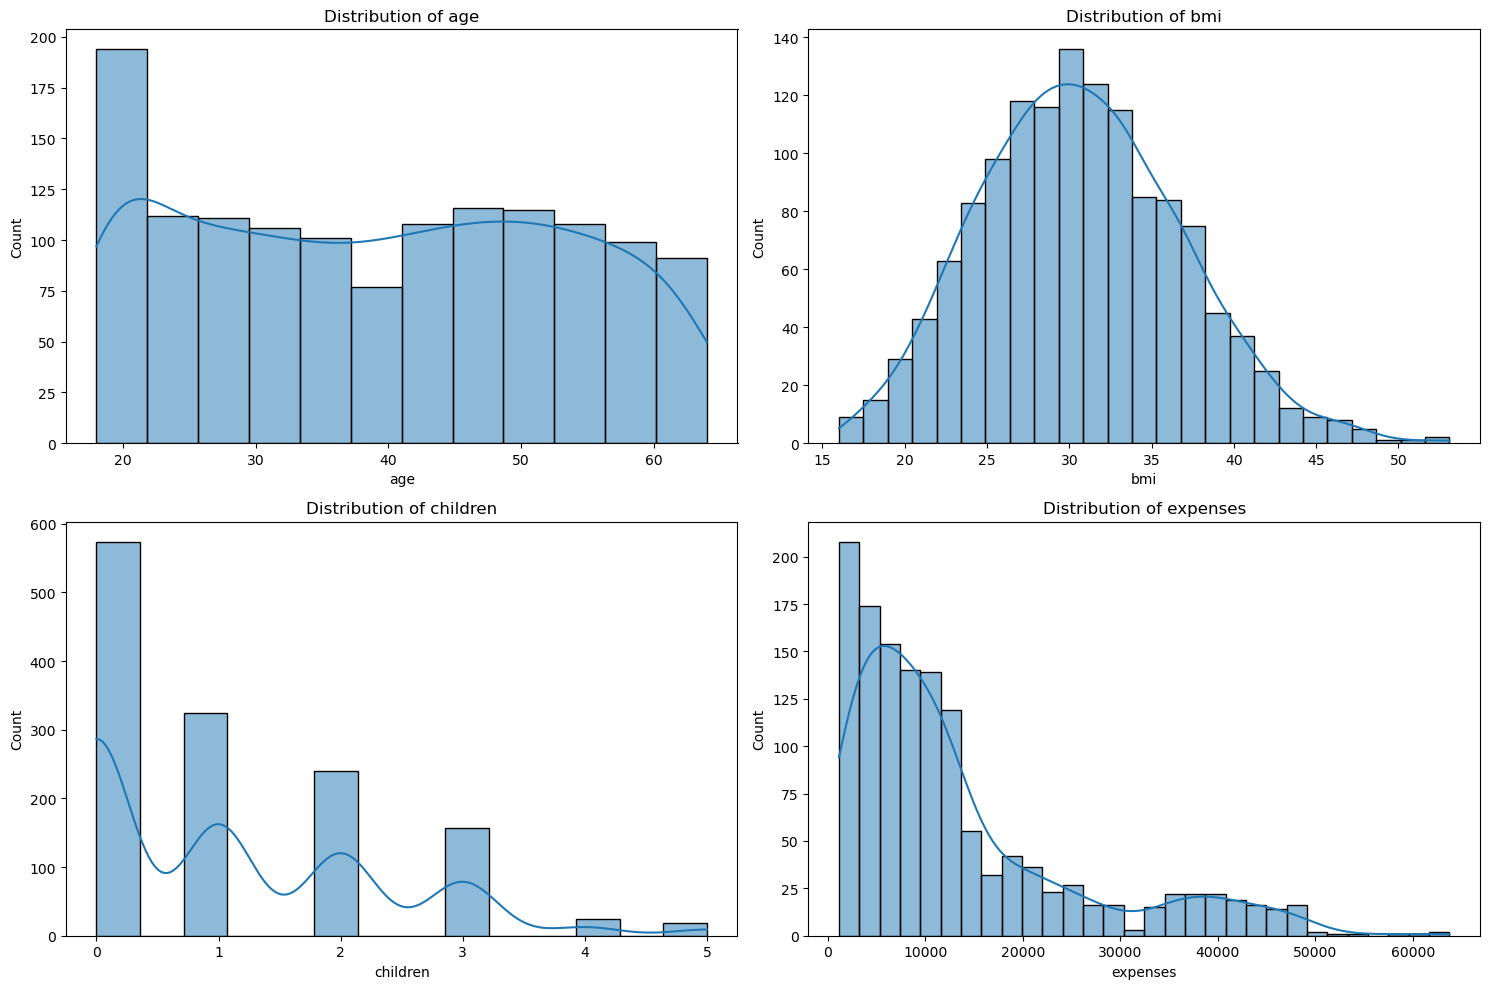

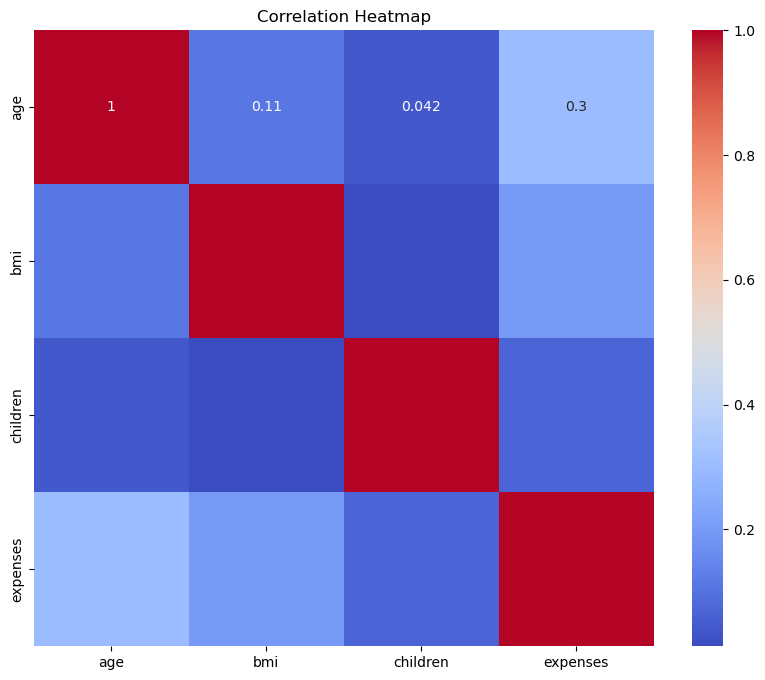

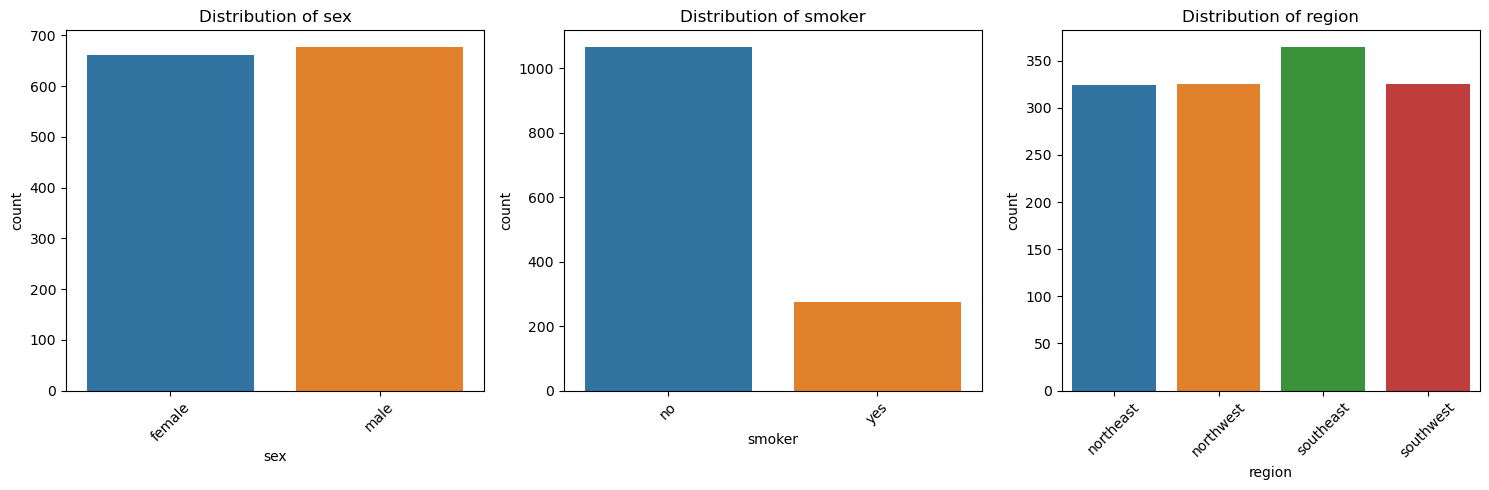

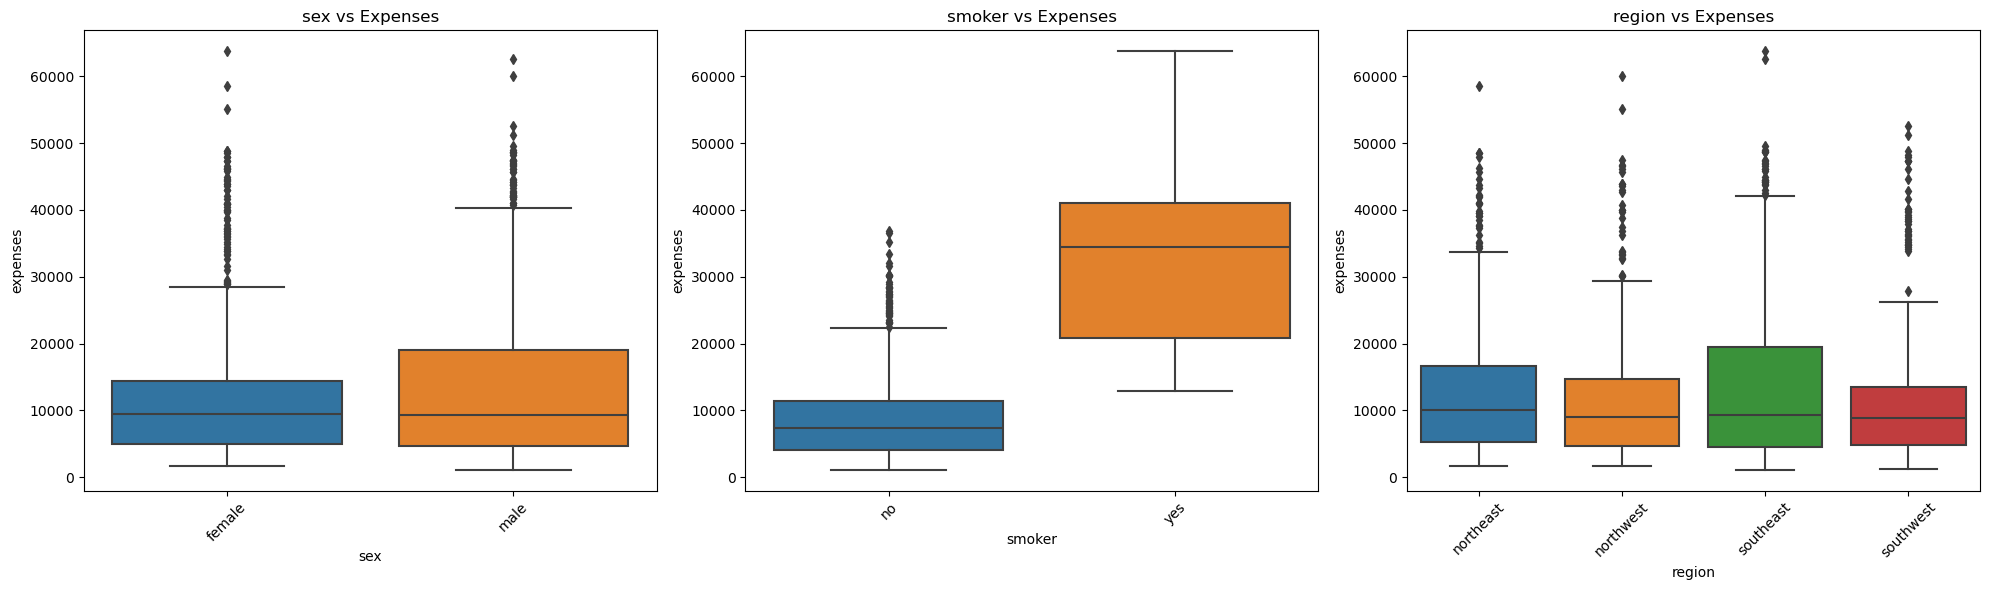

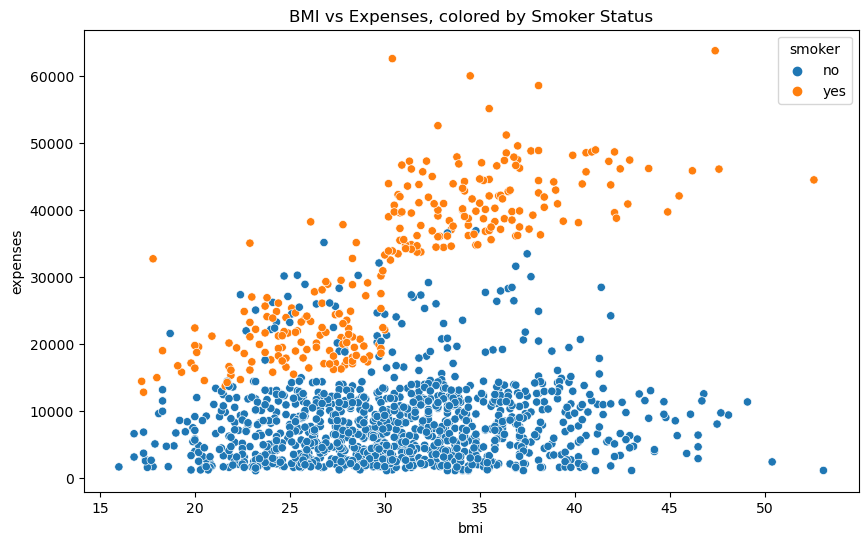

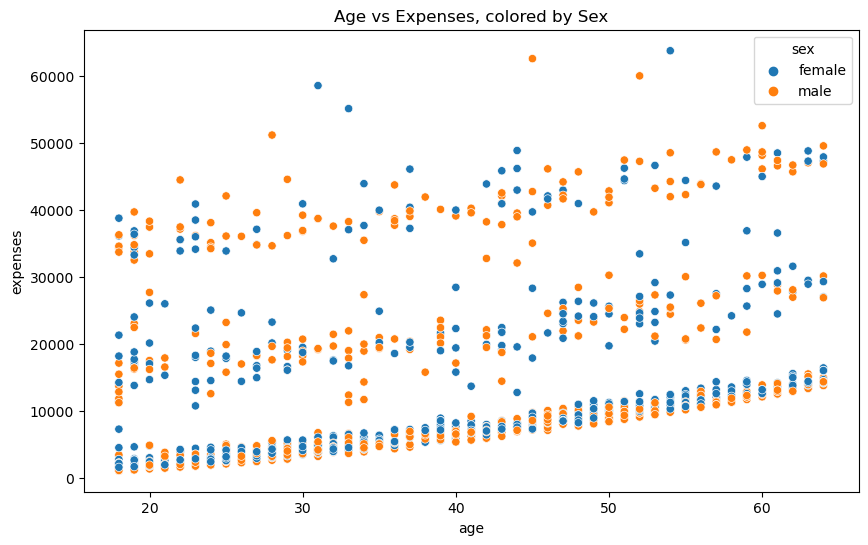

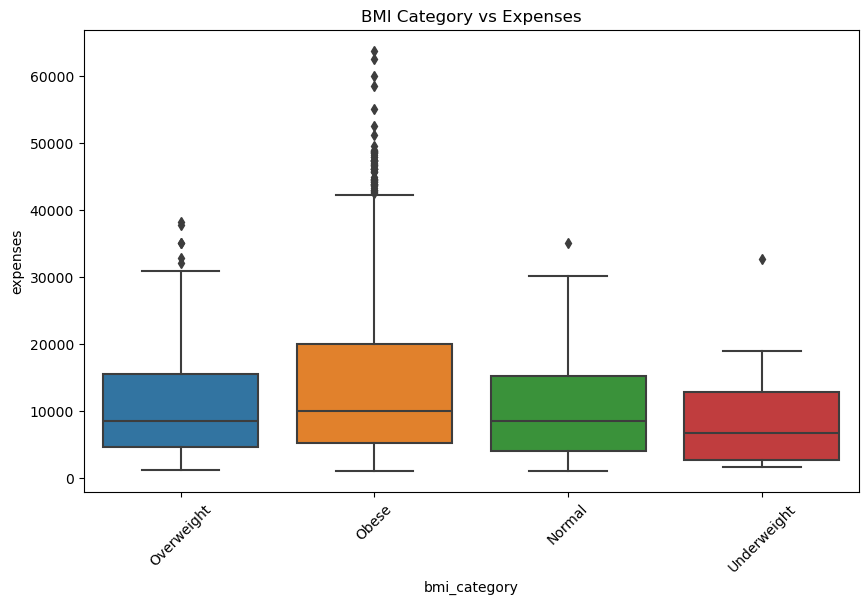


Unique values in sex: ['female', 'male']
Categories (2, object): ['female', 'male']

Unique values in smoker: ['yes', 'no']
Categories (2, object): ['no', 'yes']

Unique values in region: ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


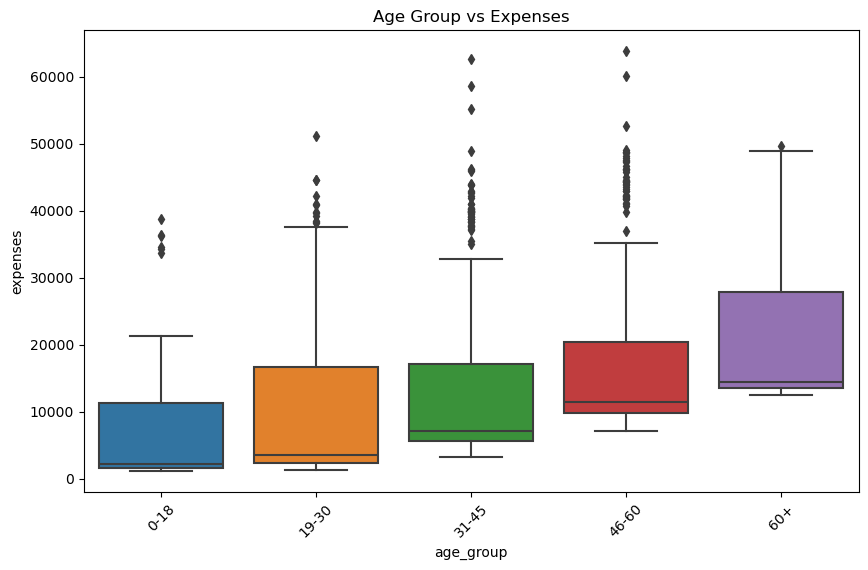

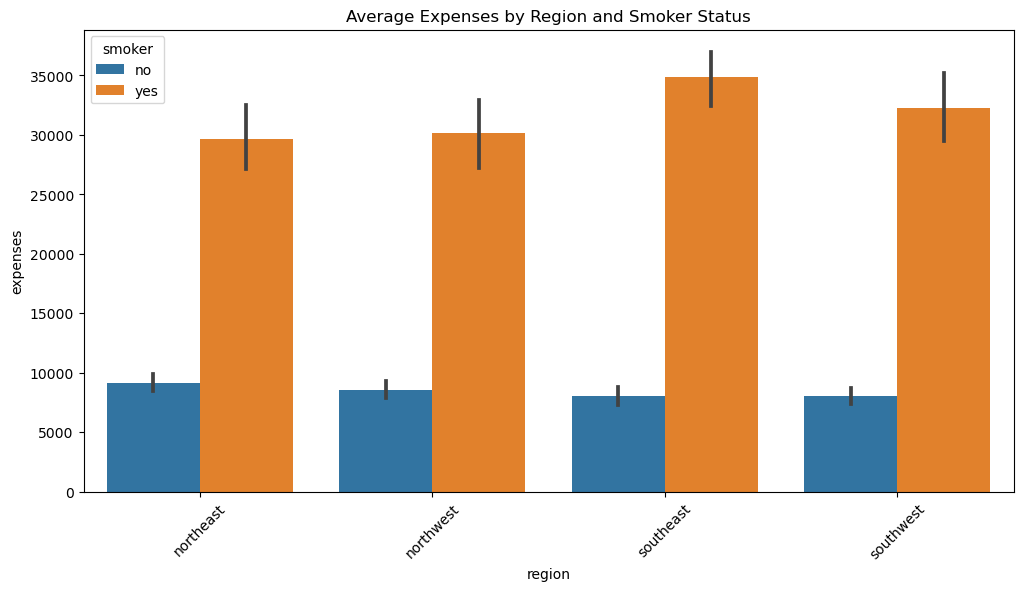

In [31]:
#Task 4: Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('insurance.csv')

# Basic data inspection
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Convert categorical columns to category type
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Distribution of numerical variables
numerical_cols = ['age', 'bmi', 'children', 'expenses']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Categorical variable analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Relationship between categorical variables and expenses
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='expenses', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Expenses')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# BMI vs Expenses, colored by Smoker Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df)
plt.title('BMI vs Expenses, colored by Smoker Status')
plt.show()

# Age vs Expenses, colored by Sex
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='sex', data=df)
plt.title('Age vs Expenses, colored by Sex')
plt.show()

# Additional analysis: BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='expenses', data=df)
plt.title('BMI Category vs Expenses')
plt.xticks(rotation=45)
plt.show()

# Print unique values in categorical columns
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")

# Additional analysis: Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='expenses', data=df)
plt.title('Age Group vs Expenses')
plt.xticks(rotation=45)
plt.show()

# Expenses by region and smoker status
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='expenses', hue='smoker', data=df)
plt.title('Average Expenses by Region and Smoker Status')
plt.xticks(rotation=45)
plt.show()

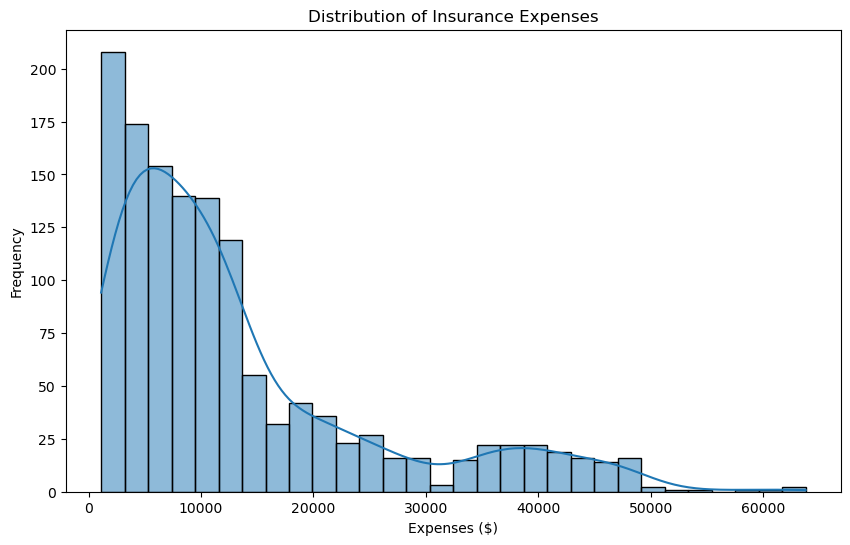

In [33]:
#Task 5: Data Visualization : 
#Distribution of Insurance Expenses
plt.figure(figsize=(10, 6))
sns.histplot(df['expenses'], kde=True)
plt.title('Distribution of Insurance Expenses')
plt.xlabel('Expenses ($)')
plt.ylabel('Frequency')
plt.show()

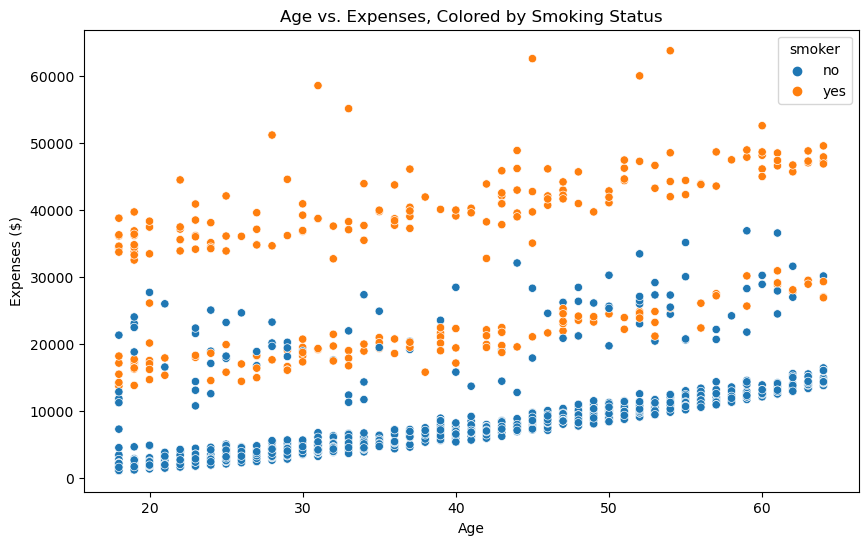

In [35]:
#Age vs. Expenses, Colored by Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df)
plt.title('Age vs. Expenses, Colored by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Expenses ($)')
plt.show()

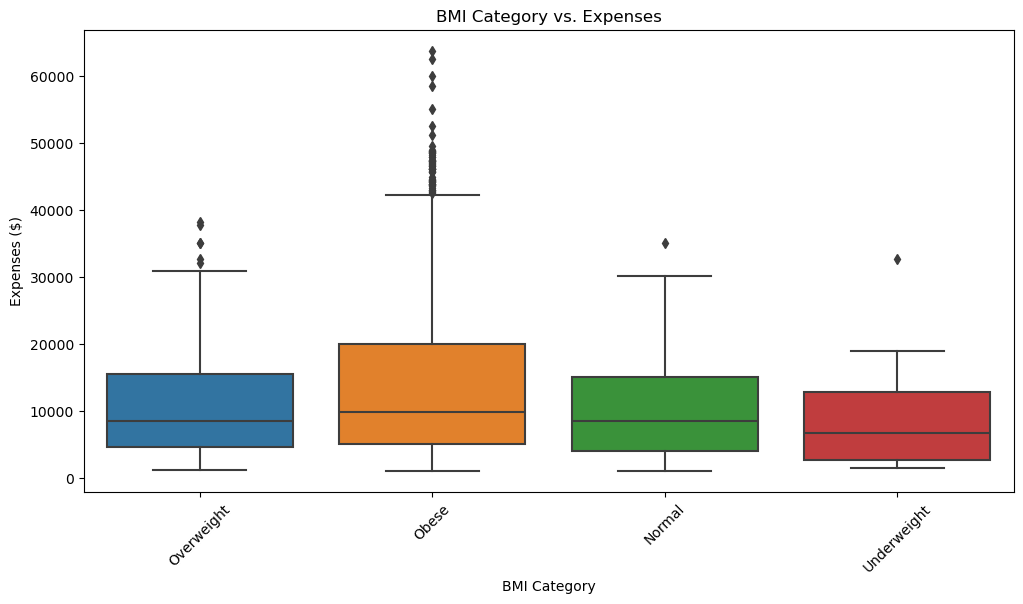

In [37]:
#BMI Category vs. Expenses
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi_category', y='expenses', data=df)
plt.title('BMI Category vs. Expenses')
plt.xlabel('BMI Category')
plt.ylabel('Expenses ($)')
plt.xticks(rotation=45)
plt.show()

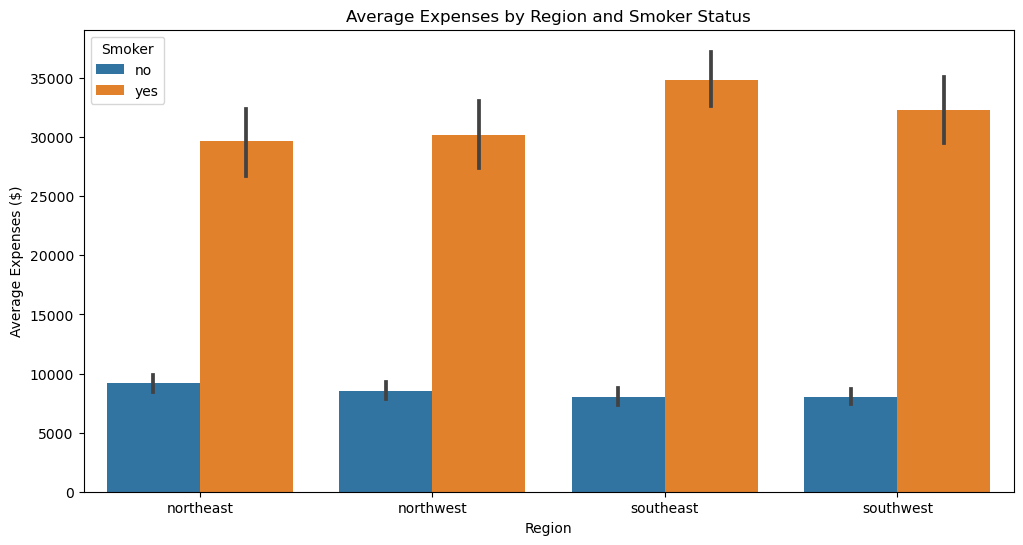

In [39]:
#Average Expenses by Region and Smoker Status
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='expenses', hue='smoker', data=df)
plt.title('Average Expenses by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average Expenses ($)')
plt.legend(title='Smoker')
plt.show()

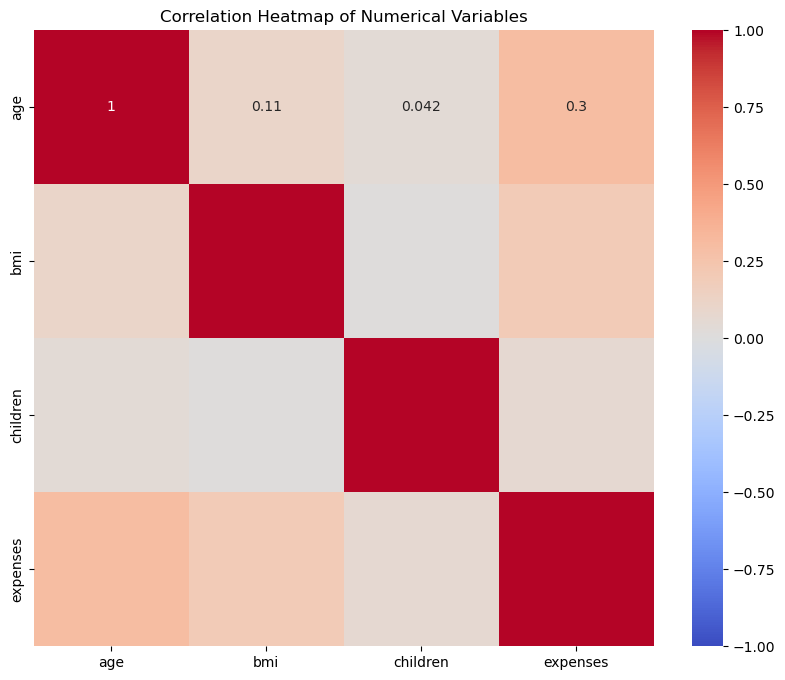

In [41]:
#Correlation Heatmap of Numerical Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'bmi', 'children', 'expenses']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

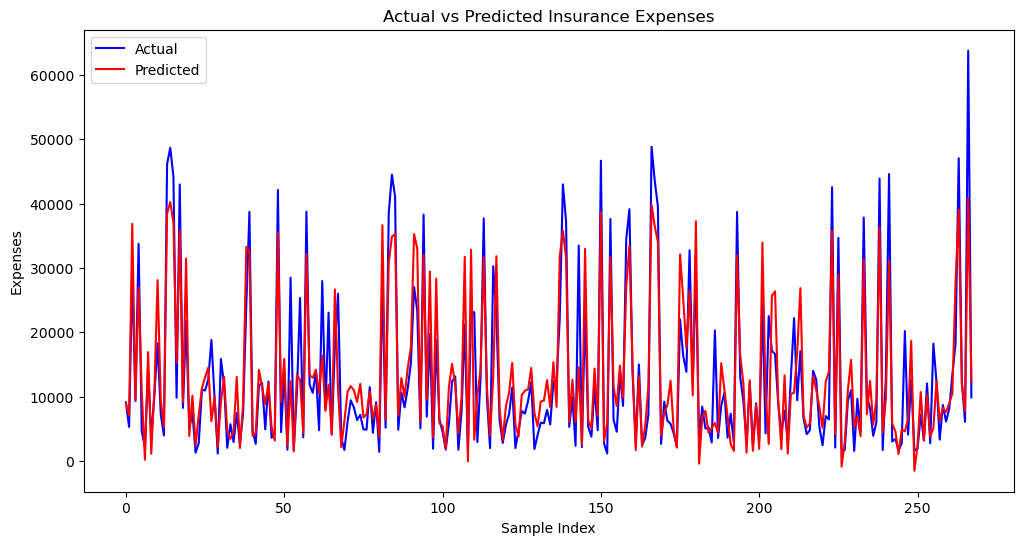

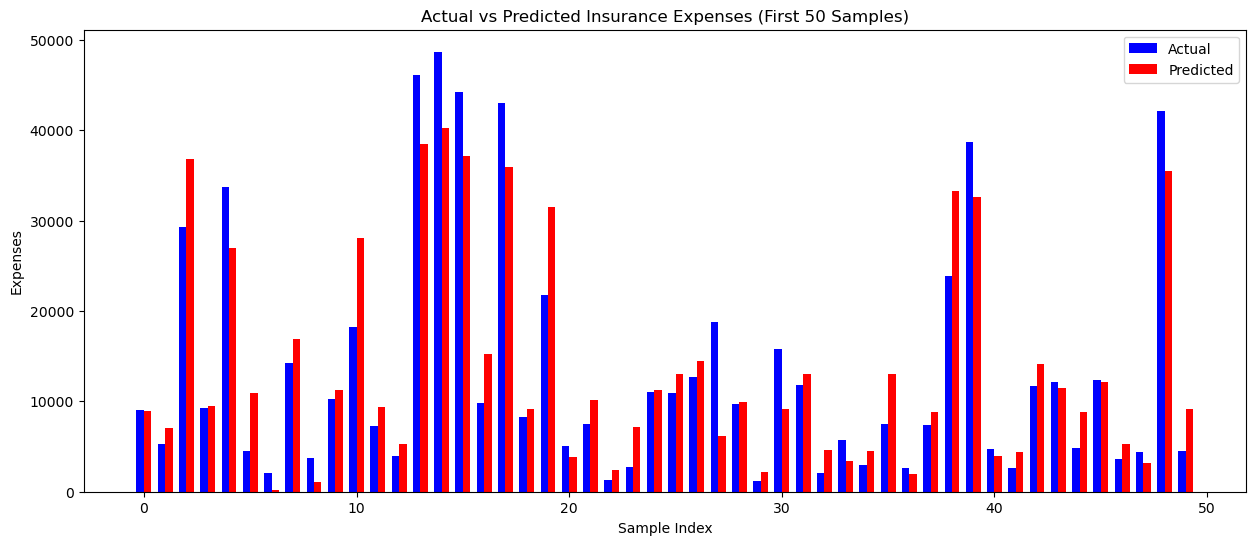

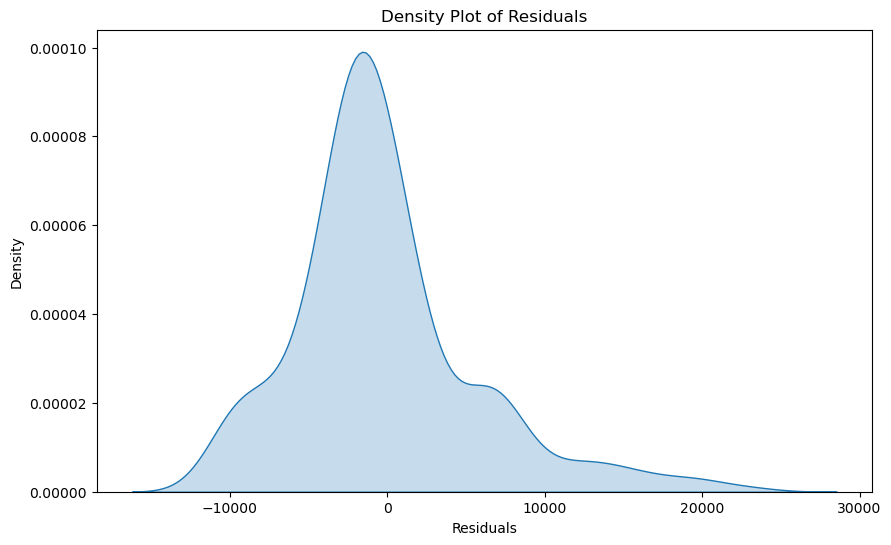

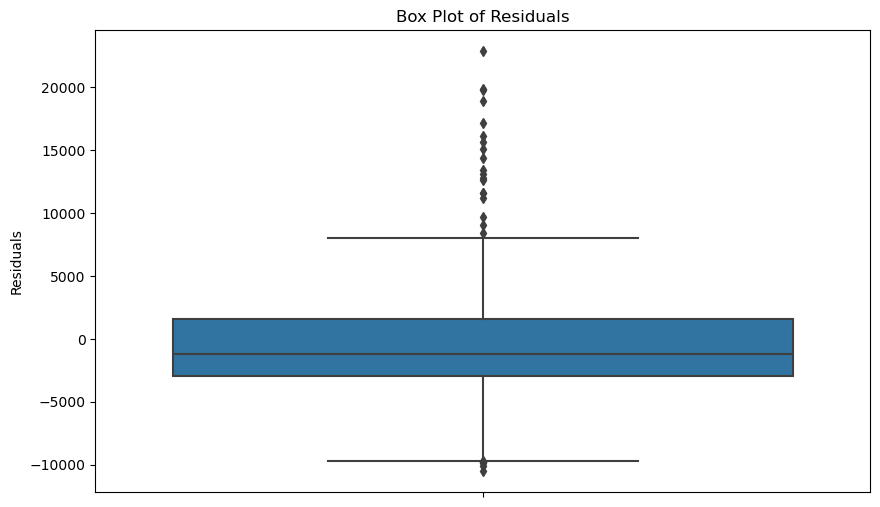

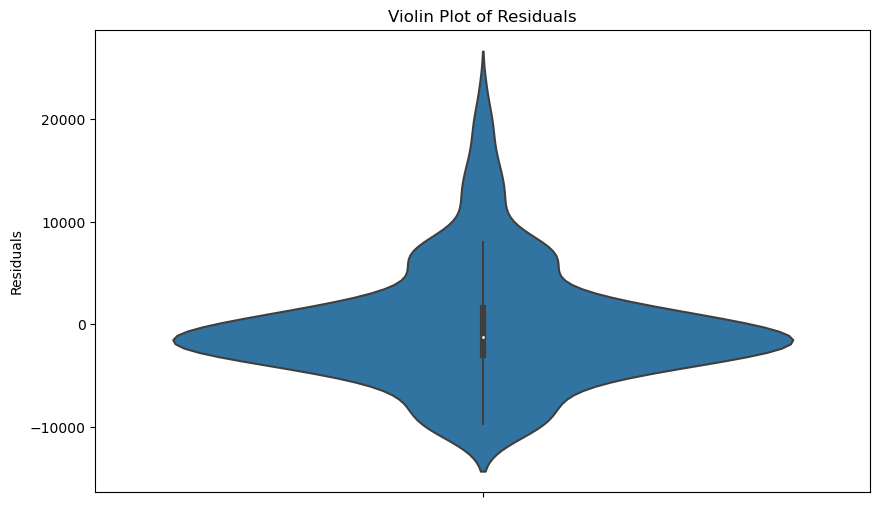

In [47]:
#Task 6: Predictive Model 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the model has been trained and predictions have been made
# y_test: actual values
# y_pred: predicted values
# residuals: y_test - y_pred

# 1. Line Plot for Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Insurance Expenses')
plt.xlabel('Sample Index')
plt.ylabel('Expenses')
plt.legend()
plt.show()

# 2. Bar Plot for Actual vs Predicted Values (first 50 samples)
plt.figure(figsize=(15, 6))
x = np.arange(50)
width = 0.35
plt.bar(x - width/2, y_test[:50], width, label='Actual', color='blue')
plt.bar(x + width/2, y_pred[:50], width, label='Predicted', color='red')
plt.title('Actual vs Predicted Insurance Expenses (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Expenses')
plt.legend()
plt.show()

# 3. Density Plot for Residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# 4. Box Plot for Residuals
plt.figure(figsize=(10, 6))
sns.boxplot(y=residuals)
plt.title('Box Plot of Residuals')
plt.ylabel('Residuals')
plt.show()

# 5. Violin Plot for Residuals
plt.figure(figsize=(10, 6))
sns.violinplot(y=residuals)
plt.title('Violin Plot of Residuals')
plt.ylabel('Residuals')
plt.show()